In [12]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0cf3f9d5-397a-4617-82be-279b6b078b82',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2023-11-03T12:45:16.883Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 8832}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10518, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [13]:
type(data)

dict

In [26]:
import pandas as pd
#This allows you to see all the columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [15]:
#This normallizes the data and makes it all pretty in the dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10518,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.953198e+07,1.953198e+07,False,NaN,1,NaN,NaN,None,2023-11-03T12:44:00.000Z,34367.171400,2.025650e+10,-24.6660,0.347030,-3.030344,1.072478,24.436956,32.976829,18.578539,6.712587e+11,52.5929,7.217106e+11,None,2023-11-03T12:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
1,1027,Ethereum,ETH,ethereum,7691,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202683e+08,1.202683e+08,True,NaN,2,NaN,NaN,None,2023-11-03T12:44:00.000Z,1795.550678,8.209441e+09,-30.9548,0.341548,-2.407401,0.515552,8.854459,10.121457,-1.853487,2.159479e+11,16.9194,2.159479e+11,None,2023-11-03T12:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
2,825,Tether USDt,USDT,tether,65025,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.520227e+10,8.762562e+10,True,NaN,3,NaN,NaN,None,2023-11-03T12:43:00.000Z,1.000293,3.543723e+10,-22.1105,0.004065,-0.029655,0.021105,0.042157,0.055409,0.145850,8.522724e+10,6.6775,8.765129e+10,None,2023-11-03T12:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-03 12:45:27.665352
3,1839,BNB,BNB,bnb,1721,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517032e+08,1.517032e+08,False,NaN,4,NaN,NaN,None,2023-11-03T12:43:00.000Z,227.968594,4.580481e+08,-3.6023,0.181941,-1.469378,0.299407,7.005444,6.729884,-5.546751,3.458357e+10,2.7096,3.458357e+10,None,2023-11-03T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
4,52,XRP,XRP,xrp,1127,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.361584e+10,9.998832e+10,False,NaN,5,NaN,NaN,None,2023-11-03T12:44:00.000Z,0.605149,1.685609e+09,-11.8593,0.197134,-2.379498,9.969307,13.203634,20.450363,-3.147237,3.244559e+10,2.5421,6.051493e+10,None,2023-11-03T12:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
5,3408,USDC,USDC,usd-coin,14756,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.448702e+10,2.448702e+10,False,NaN,6,NaN,NaN,None,2023-11-03T12:43:00.000Z,1.000113,4.279843e+09,-26.3305,-0.006447,0.003583,0.006042,0.022772,0.000524,0.004391,2.448978e+10,1.9166,2.448978e+10,None,2023-11-03T12:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-03 12:45:27.665352
6,5426,Solana,SOL,solana,540,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.195847e+08,5.615995e+08,True,NaN,7,NaN,NaN,None,2023-11-03T12:44:00.000Z,39.555402,2.565478e+09,-33.3174,1.325912,-10.617866,20.580812,67.583695,102.752552,74.388927,1.659684e+10,1.2989,2.221429e+10,None,2023-11-03T12:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
7,2010,Cardano,ADA,cardano,958,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.524861e+10,3.632019e+10,False,NaN,8,NaN,NaN,None,2023-11-03T12:43:00.000Z,0.319946,5.109775e+08,40.9016,0.621590,2.967854,11.761405,24.461609,25.081402,10.038385,1.127765e+10,0.8836,1.439756e+10,None,2023-11-03T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
8,74,Dogecoin,DOGE,dogecoin,818,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.41677

In [29]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0cf3f9d5-397a-4617-82be-279b6b078b82',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)   


 # Use this if you want to create a csv and append data to it    
   # df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    #if not os.path.isfile(r'C:\Users\admin\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\admin\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\admin\Documents\Python Scripts\API.csv', mode='a', header=False) 
        
   #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
      

In [30]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit()    

{'status': {'timestamp': '2023-11-03T13:31:32.085Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 8832}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10518, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-11-03T13:32:33.379Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 8832}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10518, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


KeyboardInterrupt: 

In [31]:
df3 = pd.read_csv(r'C:\Users\admin\Documents\Python Scripts\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10518,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.953198e+07,1.953198e+07,False,NaN,1,NaN,NaN,NaN,2023-11-03T13:31:00.000Z,34368.695951,1.991080e+10,-20.8493,-0.055608,-2.245826,0.584854,24.833364,32.738301,18.558687,6.712885e+11,52.5646,7.217426e+11,NaN,2023-11-03T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:31:33.951331
1,1,1027,Ethereum,ETH,ethereum,7691,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202683e+08,1.202683e+08,True,NaN,2,NaN,NaN,NaN,2023-11-03T13:31:00.000Z,1795.151758,8.088147e+09,-29.3228,-0.101388,-1.817262,0.073616,9.328076,9.880142,-1.905348,2.158999e+11,16.9058,2.158999e+11,NaN,2023-11-03T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:31:33.951331
2,2,825,Tether USDt,USDT,tether,65026,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.520227e+10,8.762562e+10,True,NaN,3,NaN,NaN,NaN,2023-11-03T13:30:00.000Z,1.000183,3.480983e+10,-21.0445,0.003912,-0.058648,-0.023282,0.017172,0.051136,0.145645,8.521786e+10,6.6729,8.764165e+10,NaN,2023-11-03T13:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-03 13:31:33.951331
3,3,1839,BNB,BNB,bnb,1721,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.517032e+08,1.517032e+08,False,NaN,4,NaN,NaN,NaN,2023-11-03T13:30:00.000Z,227.669038,4.335413e+08,-11.5731,0.191791,-2.296926,-0.584771,7.007100,5.658925,-5.687478,3.453812e+10,2.7045,3.453812e+10,NaN,2023-11-03T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:31:33.951331
4,4,52,XRP,XRP,xrp,1127,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.361584e+10,9.998832e+10,False,NaN,5,NaN,NaN,NaN,2023-11-03T13:31:00.000Z,0.607849,1.659720e+09,-12.5114,0.571144,-1.338336,9.975617,14.429829,21.006374,-2.896980,3.259034e+10,2.5520,6.078492e+10,NaN,2023-11-03T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:31:33.951331
5,5,3408,USDC,USDC,usd-coin,14756,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.448702e+10,2.448702e+10,False,NaN,6,NaN,NaN,NaN,2023-11-03T13:30:00.000Z,1.000005,4.212861e+09,-25.4966,-0.000318,-0.008068,-0.033497,0.000493,-0.011492,0.012525,2.448715e+10,1.9174,2.448715e+10,NaN,2023-11-03T13:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-03 13:31:33.951331
6,6,5426,Solana,SOL,solana,540,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.195847e+08,5.615995e+08,True,NaN,7,NaN,NaN,NaN,2023-11-03T13:31:00.000Z,39.145024,2.495934e+09,-34.9705,-0.872202,-9.086896,19.353739,68.584420,99.466916,72.453668,1.642465e+10,1.2861,2.198382e+10,NaN,2023-11-03T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:31:33.951331
7,7,2010,Cardano,ADA,cardano,958,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.524861e+10,3.632019e+10,False,NaN,8,NaN,NaN,NaN,2023-11-03T13:30:00.000Z,0.317284,5.034451e+08,40.4315,-0.271599,2.572292,9.447731,23.949907,23.577734,8.956135,1.118383e+10,0.8757,1.427779e+10,NaN,2023-11-03T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:31:33.951331
8,8,74,Dogecoin,DOGE,dogecoin,818,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-exc

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10518,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.953198e+07,1.953198e+07,False,NaN,1,NaN,NaN,None,2023-11-03T12:44:00.000Z,34367.171400,2.025650e+10,-24.6660,0.347030,-3.030344,1.072478,24.436956,32.976829,18.578539,6.712587e+11,52.5929,7.217106e+11,None,2023-11-03T12:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
1,1027,Ethereum,ETH,ethereum,7691,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202683e+08,1.202683e+08,True,NaN,2,NaN,NaN,None,2023-11-03T12:44:00.000Z,1795.550678,8.209441e+09,-30.9548,0.341548,-2.407401,0.515552,8.854459,10.121457,-1.853487,2.159479e+11,16.9194,2.159479e+11,None,2023-11-03T12:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
2,825,Tether USDt,USDT,tether,65025,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.520227e+10,8.762562e+10,True,NaN,3,NaN,NaN,None,2023-11-03T12:43:00.000Z,1.000293,3.543723e+10,-22.1105,0.004065,-0.029655,0.021105,0.042157,0.055409,0.145850,8.522724e+10,6.6775,8.765129e+10,None,2023-11-03T12:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-03 12:45:27.665352
3,1839,BNB,BNB,bnb,1721,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.517032e+08,1.517032e+08,False,NaN,4,NaN,NaN,None,2023-11-03T12:43:00.000Z,227.968594,4.580481e+08,-3.6023,0.181941,-1.469378,0.299407,7.005444,6.729884,-5.546751,3.458357e+10,2.7096,3.458357e+10,None,2023-11-03T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
4,52,XRP,XRP,xrp,1127,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.361584e+10,9.998832e+10,False,NaN,5,NaN,NaN,None,2023-11-03T12:44:00.000Z,0.605149,1.685609e+09,-11.8593,0.197134,-2.379498,9.969307,13.203634,20.450363,-3.147237,3.244559e+10,2.5421,6.051493e+10,None,2023-11-03T12:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
5,3408,USDC,USDC,usd-coin,14756,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.448702e+10,2.448702e+10,False,NaN,6,NaN,NaN,None,2023-11-03T12:43:00.000Z,1.000113,4.279843e+09,-26.3305,-0.006447,0.003583,0.006042,0.022772,0.000524,0.004391,2.448978e+10,1.9166,2.448978e+10,None,2023-11-03T12:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-03 12:45:27.665352
6,5426,Solana,SOL,solana,540,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.195847e+08,5.615995e+08,True,NaN,7,NaN,NaN,None,2023-11-03T12:44:00.000Z,39.555402,2.565478e+09,-33.3174,1.325912,-10.617866,20.580812,67.583695,102.752552,74.388927,1.659684e+10,1.2989,2.221429e+10,None,2023-11-03T12:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
7,2010,Cardano,ADA,cardano,958,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.524861e+10,3.632019e+10,False,NaN,8,NaN,NaN,None,2023-11-03T12:43:00.000Z,0.319946,5.109775e+08,40.9016,0.621590,2.967854,11.761405,24.461609,25.081402,10.038385,1.127765e+10,0.8836,1.439756e+10,None,2023-11-03T12:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 12:45:27.665352
8,74,Dogecoin,DOGE,dogecoin,818,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.41677

In [32]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [33]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10518,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19531975.00000,19531975.00000,False,NaN,1,NaN,NaN,None,2023-11-03T13:32:00.000Z,34397.48502,19900683726.65971,-20.75050,-0.01512,-2.27618,0.65011,24.91570,32.86883,18.66224,671850817546.64453,52.60870,722347185498.63000,None,2023-11-03T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:32:34.938143
1,1027,Ethereum,ETH,ethereum,7691,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120268317.07365,120268317.07365,True,NaN,2,NaN,NaN,None,2023-11-03T13:32:00.000Z,1796.70509,8086857761.40359,-29.24700,-0.01815,-1.88092,0.14004,9.41639,9.99724,-1.82366,216086697227.64307,16.92050,216086697227.64001,None,2023-11-03T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:32:34.938143
2,825,Tether USDt,USDT,tether,65026,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,85202267839.06921,87625615023.71080,True,NaN,3,NaN,NaN,None,2023-11-03T13:31:00.000Z,1.00020,34770146792.50372,-20.93010,-0.00566,-0.04474,0.01196,0.02096,0.05660,0.14552,85219119335.12592,6.67300,87642945814.82001,None,2023-11-03T13:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-03 13:32:34.938143
3,1839,BNB,BNB,bnb,1721,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151703210.15233,151703210.15233,False,NaN,4,NaN,NaN,None,2023-11-03T13:31:00.000Z,227.64227,432672969.51230,-11.87480,0.05489,-2.27625,-0.57814,6.98224,5.41326,-5.68839,34534063832.18052,2.70420,34534063832.18000,None,2023-11-03T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:32:34.938143
4,52,XRP,XRP,xrp,1127,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53615837759.00000,99988316618.00000,False,NaN,5,NaN,NaN,None,2023-11-03T13:32:00.000Z,0.60789,1659527286.11802,-12.37100,0.53100,-1.32600,9.99218,14.41343,21.01359,-2.88454,32592292039.69053,2.55210,60788553162.58000,None,2023-11-03T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:32:34.938143
5,3408,USDC,USDC,usd-coin,14756,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24487016454.71414,24487016454.71414,False,NaN,6,NaN,NaN,None,2023-11-03T13:31:00.000Z,1.00003,4208624188.71838,-25.32400,-0.01545,-0.00092,0.00688,0.00078,0.00045,0.00837,24487775523.94622,1.91750,24487775523.95000,None,2023-11-03T13:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-03 13:32:34.938143
6,5426,Solana,SOL,solana,540,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,419584718.84910,561599452.59388,True,NaN,7,NaN,NaN,None,2023-11-03T13:32:00.000Z,39.15401,2494808764.07867,-34.97170,-1.00495,-9.02838,19.49963,68.61643,99.60825,72.48863,16428424598.89973,1.28640,21988871012.82000,None,2023-11-03T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-03 13:32:34.938143
7,2010,Cardano,ADA,cardano,958,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35248613761.32600,36320189326.90800,False,NaN,8,NaN,NaN,None,2023-11-03T13:31:00.000Z,0.31729,503374478.40603,40.55650,-0.45644,2.67284,9.47244,23.93962,23.55869,9.00607,11184206754.61817,0.87580,14278272256.77000,None,2023-11-03T13:31:00.000Z,NaN,N

In [34]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.01512,-2.27618,0.65011,24.91570,32.86883,18.66224
Ethereum,-0.01815,-1.88092,0.14004,9.41639,9.99724,-1.82366
Tether USDt,-0.00566,-0.04474,0.01196,0.02096,0.05660,0.14552
BNB,0.05489,-2.27625,-0.57814,6.98224,5.41326,-5.68839
XRP,0.53100,-1.32600,9.99218,14.41343,21.01359,-2.88454
USDC,-0.01545,-0.00092,0.00688,0.00078,0.00045,0.00837
Solana,-1.00495,-9.02838,19.49963,68.61643,99.60825,72.48863
Cardano,-0.45644,2.67284,9.47244,23.93962,23.55869,9.00607
Dogecoin,-0.14713,-2.51905,-6.08275,10.31313,6.17555,-11.38357


In [35]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.01512
                 quote.USD.percent_change_24h    -2.27618
                 quote.USD.percent_change_7d      0.65011
                 quote.USD.percent_change_30d    24.91570
                 quote.USD.percent_change_60d    32.86883
                 quote.USD.percent_change_90d    18.66224
Ethereum         quote.USD.percent_change_1h     -0.01815
                 quote.USD.percent_change_24h    -1.88092
                 quote.USD.percent_change_7d      0.14004
                 quote.USD.percent_change_30d     9.41639
                 quote.USD.percent_change_60d     9.99724
                 quote.USD.percent_change_90d    -1.82366
Tether USDt      quote.USD.percent_change_1h     -0.00566
                 quote.USD.percent_change_24h    -0.04474
                 quote.USD.percent_change_7d      0.01196
                 quote.USD.percent_change_30d     0.02096
                 quote.USD

In [36]:
type(df4)

pandas.core.series.Series

In [37]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.01512
                quote.USD.percent_change_24h  -2.27618
                quote.USD.percent_change_7d    0.65011
                quote.USD.percent_change_30d  24.91570
                quote.USD.percent_change_60d  32.86883
                quote.USD.percent_change_90d  18.66224
Ethereum        quote.USD.percent_change_1h   -0.01815
                quote.USD.percent_change_24h  -1.88092
                quote.USD.percent_change_7d    0.14004
                quote.USD.percent_change_30d   9.41639
                quote.USD.percent_change_60d   9.99724
                quote.USD.percent_change_90d  -1.82366
Tether USDt     quote.USD.percent_change_1h   -0.00566
                quote.USD.percent_change_24h  -0.04474
                quote.USD.percent_change_7d    0.01196
                quote.USD.percent_change_30d   0.02096
                quote.USD.percent_change_60d   0.05660
                quote.USD.percent_change_90d   0.14552
BNB             quote.USD.percent_change_1h    0.05489
                quote.USD.percent_change_24h  -2.27625
                quote.USD.percent_change_7d   -0.57814
                quote.USD.percent_change_30d   6.98224
                quote.USD.percent_change_60d   5.41326
                quote.USD.percent_change_90d  -5.68839
XRP             quote.USD.percent_change_1h    0.53100
                quote.USD.percent_change_24h  -1.32600
                quote.USD.percent_change_7d    9.99218
                quote.USD.percent_change_30d  14.41343
                quote.USD.percent_change_60d  21.01359
                quote.USD.percent_change_90d  -2.88454
USDC            quote.USD.percent_change_1h   -0.01545
                quote.USD.percent_change_24h  -0.00092
                quote.USD.percent_change_7d    0.00688
                quote.USD.percent_change_30d   0.00078
                quote.USD.percent_change_60d   0.00045
                quote.USD.percent_change_90d   0.00837
Solana          quote.USD.percent_change_1h   -1.00495
                quote.USD.percent_change_24h  -9.02838
                quote.USD.percent_change_7d   19.49963
                quote.USD.percent_change_30d  68.61643
                quote.USD.percent_change_60d  99.60825
                quote.USD.percent_change_90d  72.48863
Cardano         quote.USD.percent_change_1h   -0.45644
                quote.USD.percent_change_24h   2.67284
                quote.USD.percent_change_7d    9.47244
                quote.USD.percent_change_30d  23.93962
                quote.USD.percent_change_60d  23.55869
                quote.USD.percent_change_90d   9.00607
Dogecoin        quote.USD.percent_change_1h   -0.14713
                quote.USD.percent_change_24h  -2.51905
                quote.USD.percent_change_7d   -6.08275
                quote.USD.percent_change_30d  10.31313
                quote.USD.percent_change_60d   6.17555
                quote.USD.percent_change_90d -11.38357
TRON            quote.USD.percent_change_1h   -0.08306
                quote.USD.percent_change_24h  -2.36732
                quote.USD.percent_change_7d    4.14316
                quote.USD.percent_change_30d  10.04212
                quote.USD.percent_change_60d  26.91999
                quote.USD.percent_change_90d  26.20284
Toncoin         quote.USD.percent_change_1h    0.72971
                quote.USD.percent_change_24h  -0.34485
                quote.USD.percent_change_7d    6.64768
                quote.USD.percent_change_30d  12.45706
                quote.USD.percent_change_60d  17.39940
                quote.USD.percent_change_90d  86.64988
Chainlink       quote.USD.percent_change_1h    0.64433
                quote.USD.percent_change_24h  -1.29177
                quote.USD.percent_change_7d   -0.61959
                quote.USD.percent_change_30d  46.71853
                quote.USD.percent_change_60d  82.63962
                quote.USD.percent

In [38]:
df5.count()

values    90
dtype: int64

In [42]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01512
1,Bitcoin,quote.USD.percent_change_24h,-2.27618
2,Bitcoin,quote.USD.percent_change_7d,0.65011
3,Bitcoin,quote.USD.percent_change_30d,24.91570
4,Bitcoin,quote.USD.percent_change_60d,32.86883
5,Bitcoin,quote.USD.percent_change_90d,18.66224
6,Ethereum,quote.USD.percent_change_1h,-0.01815
7,Ethereum,quote.USD.percent_change_24h,-1.88092
8,Ethereum,quote.USD.percent_change_7d,0.14004
9,Ethereum,quote.USD.percent_change_30d,9.41639


In [43]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01512
1,Bitcoin,quote.USD.percent_change_24h,-2.27618
2,Bitcoin,quote.USD.percent_change_7d,0.65011
3,Bitcoin,quote.USD.percent_change_30d,24.91570
4,Bitcoin,quote.USD.percent_change_60d,32.86883
5,Bitcoin,quote.USD.percent_change_90d,18.66224
6,Ethereum,quote.USD.percent_change_1h,-0.01815
7,Ethereum,quote.USD.percent_change_24h,-1.88092
8,Ethereum,quote.USD.percent_change_7d,0.14004
9,Ethereum,quote.USD.percent_change_30d,9.41639


In [44]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01512
1,Bitcoin,24h,-2.27618
2,Bitcoin,7d,0.65011
3,Bitcoin,30d,24.91570
4,Bitcoin,60d,32.86883
5,Bitcoin,90d,18.66224
6,Ethereum,quote.USD.percent_change_1h,-0.01815
7,Ethereum,24h,-1.88092
8,Ethereum,7d,0.14004
9,Ethereum,30d,9.41639


In [50]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.01512
1,Bitcoin,24h,-2.27618
2,Bitcoin,7d,0.65011
3,Bitcoin,30d,24.91570
4,Bitcoin,60d,32.86883
5,Bitcoin,90d,18.66224
6,Ethereum,1h,-0.01815
7,Ethereum,24h,-1.88092
8,Ethereum,7d,0.14004
9,Ethereum,30d,9.41639


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

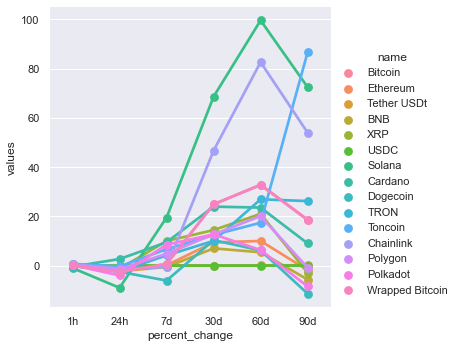

In [51]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [52]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,34397.48502,2023-11-03 13:32:34.938143


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

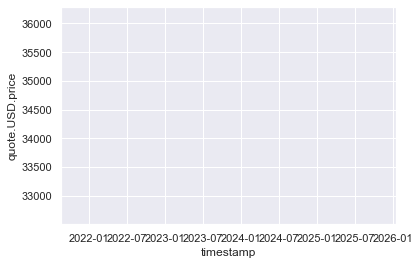

In [48]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)